In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### 1.Data 데이터프레임화

In [3]:
df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 2.Label 데이터프레임화

In [4]:
y = pd.DataFrame(iris_data['target'], columns=['targets'])
y

,targets
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### 3.행의 개수 같은지 확인하기.

In [5]:
X = df
print(X.shape)
print(y.shape)


(150, 4)
(150, 1)


### 4.target에 있는 분류값을 문자화하기

In [6]:
# # 방법1
# for a, i in enumerate(iris_data['target_names']):
#     y['targets'] = y['targets'].replace(a, i)
    
# # 방법2
# y['targets'] = y['targets'].apply(lambda x: str(x).replace(str(x), iris_data['target_names'][x] ))
# y

In [7]:
# # 내가 사용한 방법
# iris_data['target_names']
# y_ch = []
# y_test = y
# for n in range(150):
#     if y['targets'][n] == 0:
#         y_ch.append(iris_data['target_names'][0])
#     elif y['targets'][n] == 1:
#         y_ch.append(iris_data['target_names'][1])
#     else:
#         y_ch.append(iris_data['target_names'][2])
        
# y_test = pd.DataFrame(y_ch, columns=['targets']) 
# # c = pd.concat(y_test, y)

In [8]:
# apply 연습

df2 = pd.DataFrame(iris_data['data'], columns=['s2', 's3', 's4', 's5'])

df2['s3'] = df2['s3'].apply(lambda x : x**2)

df2

,s2,s3,s4,s5
0,5.1,12.25,1.4,0.2
1,4.9,9.00,1.4,0.2
2,4.7,10.24,1.3,0.2
3,4.6,9.61,1.5,0.2
4,5.0,12.96,1.4,0.2
...,...,...,...,...
145,6.7,9.00,5.2,2.3
146,6.3,6.25,5.0,1.9
147,6.5,9.00,5.2,2.0
148,6.2,11.56,5.4,2.3


### 5.관계가 가장 높은 독립변수는 뭘까?

In [9]:
df = pd.concat([X,y], axis=1) #열에 추가
df.corrwith(df['targets'])

sepal length (cm)    0.782561
sepal width (cm)    -0.426658
petal length (cm)    0.949035
petal width (cm)     0.956547
targets              1.000000
dtype: float64

문제가 있다. target은 명목척도인데, 명목척도로 인식하지 못했다.
### 6.원한으로 바꿔주자

In [10]:
setosa = []
versicolor = []
virginica = []

for i in iris_data["target"]:
    if i == 0:
        setosa.append(1)
        versicolor.append(0)
        virginica.append(0)
    elif i == 1:
        setosa.append(0)
        versicolor.append(1)
        virginica.append(0)
    else:
        setosa.append(0)
        versicolor.append(0)
        virginica.append(1)

df["is setosa"] = setosa
df["is versicolor"] = versicolor
df["is virginica"] = virginica

df.columns = ['꽃받침 길이(cm)', '꽃받침 폭(cm)', '꽃잎 길이(cm)',
       '꽃잎 폭(cm)', 'targets', 'is setosa', 'is versicolor',
       'is virginica']

In [11]:
targer_corr = pd.concat([df.corrwith(df['is setosa']),
                         df.corrwith(df['is versicolor']),
                         df.corrwith(df['is virginica'])],
                        axis = 1)

targer_corr.columns = ['is setosa', 'is versicolor', 'is virginica']
targer_corr

,is setosa,is versicolor,is virginica
꽃받침 길이(cm),-0.717416,7.939552e-02,0.638020
꽃받침 폭(cm),0.603348,-4.677031e-01,-0.135645
꽃잎 길이(cm),-0.922765,2.017545e-01,0.721011
꽃잎 폭(cm),-0.887344,1.178988e-01,0.769445
targets,-0.866025,5.768888e-18,0.866025
is setosa,1.000000,-5.000000e-01,-0.500000
is versicolor,-0.500000,1.000000e+00,-0.500000
is virginica,-0.500000,-5.000000e-01,1.000000


## 모델 학습

### 1.훈련셋과 테스트셋 나누기
    #### 1-1.훈련셋과 테스트셋 모양 확인
### 2.모델 학습
### 3.모델 평가
### 4.


In [12]:
# skilearn
# class : model_selection
# def : train

# 1.훈련셋과 테스트셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112, 1)
(38, 1)


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

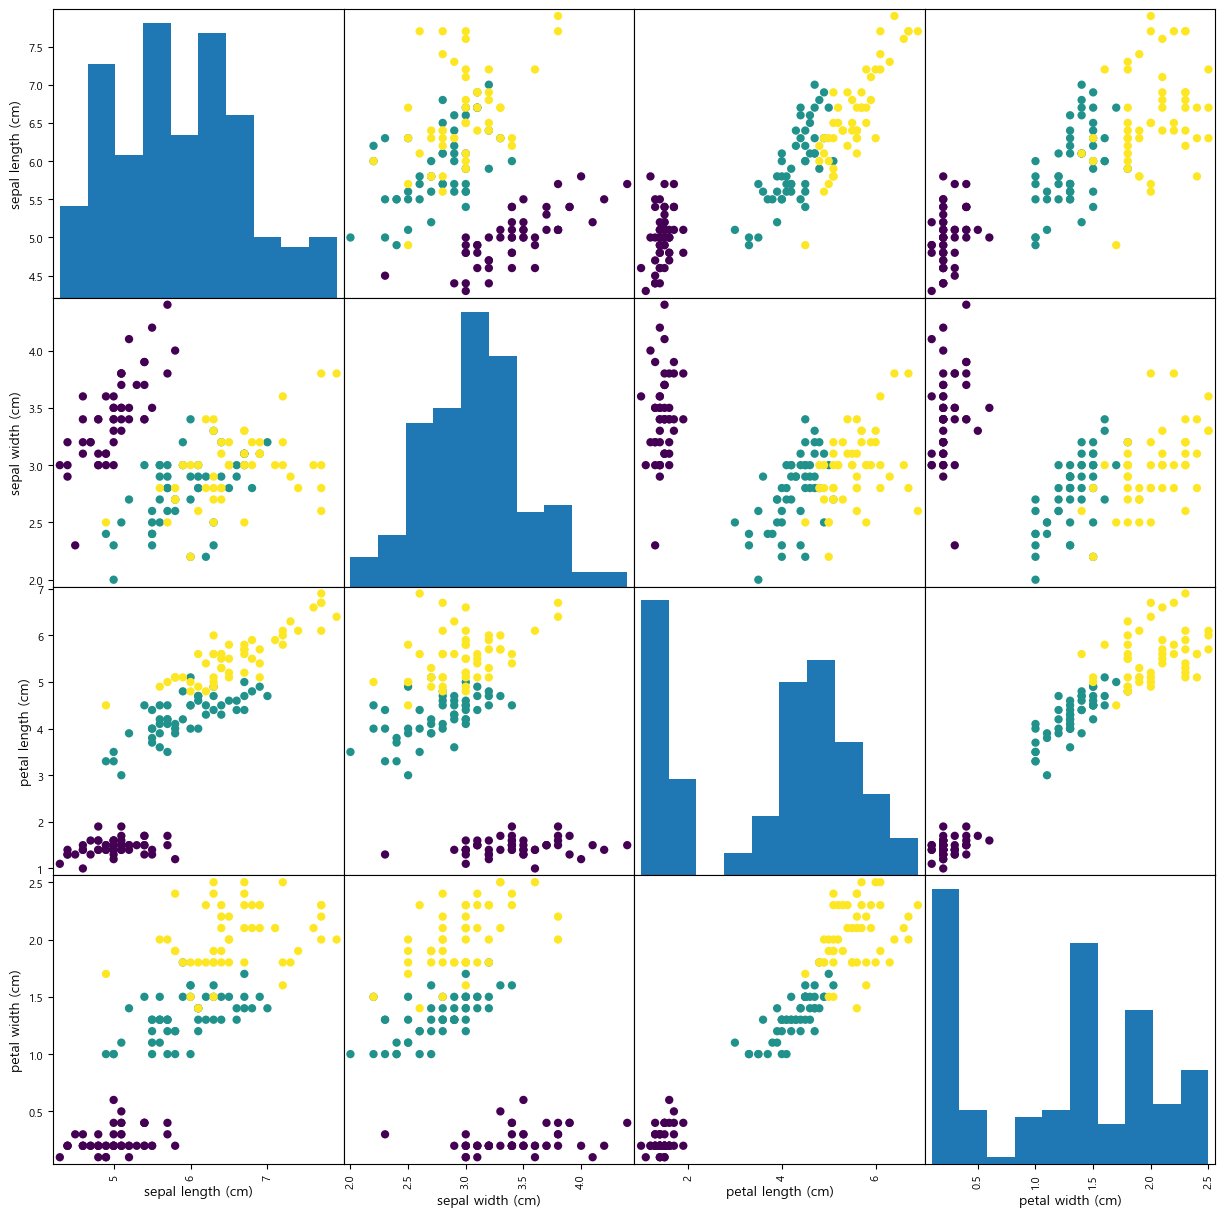

In [13]:
pd.plotting.scatter_matrix(X
                           ,figsize=(15,15)
                           ,marker="o",c=np.array(y)
                           ,alpha=1)

# feature selection을 할 때, 잎보다 꽃으로 구분하는 것이 더 좋다
# setosa는 웬만하면 잘 구분됨, ovr을 할 때는 setosa 먼저하는 것이 좋음

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

predict = knn.predict(X_test)
predict



accuracy_score(predict, y_test)

# # 예측하고 싶은 데이터를 2차원 배열에 넣기
# X_new = np.array([[5, 2.9, 1, 0.2]])
# print("X_new.shape:", X_new.shape, "\n")

# # knn 객체의 predict메서드 사용 : knn.predict(X_new)
# prediction = knn.predict(X_new)
# print("예측:", prediction)
# print("예측한 타깃의 이름:", 
#        iris_dataset['target_names'][prediction])

c:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9736842105263158

100%|██████████| 99/99 [00:00<00:00, 236.60it/s]


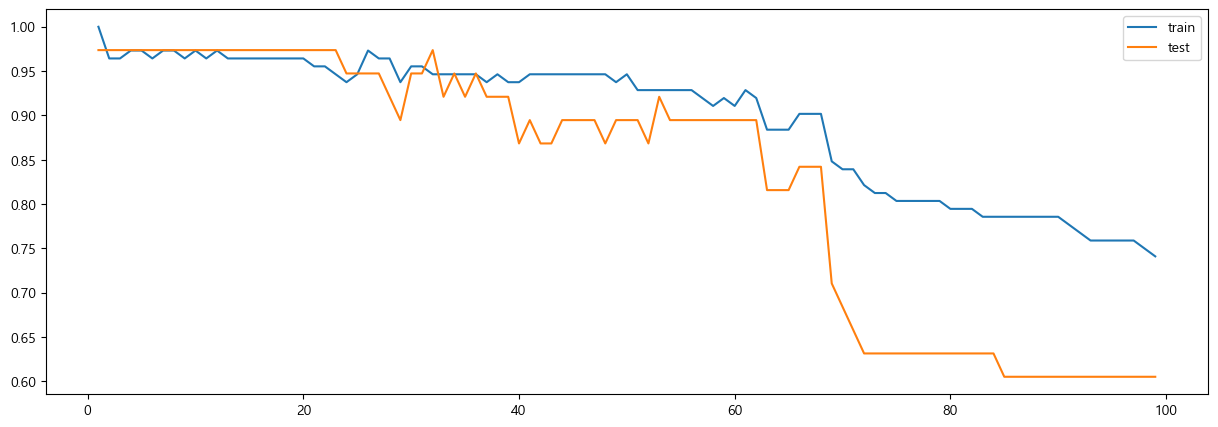

In [15]:
from tqdm import tqdm
train_list = []
test_list = []

for i in tqdm(range(1,100)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.values.ravel())
    train_list.append(knn.score(X_train, y_train))
    test_list.append(knn.score(X_test, y_test))
    
plt.figure(figsize = (15,5))
plt.plot(range(1,100), train_list, label = "train")
plt.plot(range(1,100), test_list, label = "test")
plt.legend(loc = "upper right") 
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples = 60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

model = LinearRegression()

model.fit(X_train, y_train)

# mse구함
model.score(X_train, y_train) , model.score(X_test, y_test)

(0.6592061059587275, 0.6932519118518163)

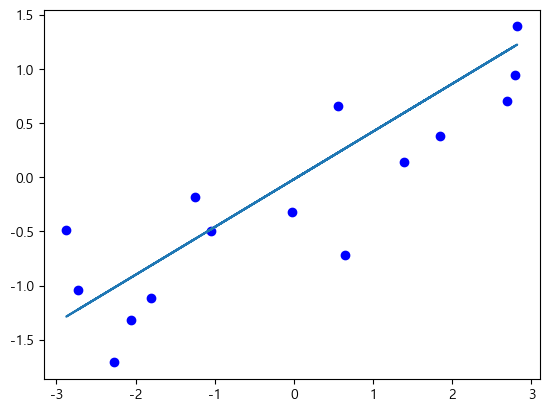

In [17]:
# plt.plot(X_test, [model.coef_ * x + model.intercept_ for x in X_test])
plt.plot(X_test, model.predict(X_test))
plt.scatter(X_test, y_test, c="b")

In [18]:
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.make_wave(n_samples = 60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

model1 = Ridge(alpha=0.001)

model1.fit(X_train, y_train)

# mse구함
result1 = model1.score(X_train, y_train) , model1.score(X_test, y_test)


In [19]:
from sklearn.linear_model import Lasso

X, y = mglearn.datasets.make_wave(n_samples = 60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

model1 = Lasso(alpha=0.001)

model1.fit(X_train, y_train)

# mse구함
result1 = model1.score(X_train, y_train) , model1.score(X_test, y_test)


  0%|          | 0/150 [00:00<?, ?it/s]C:\Users\user\AppData\Local\Temp\ipykernel_2160\515551334.py:20: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.950e+00, tolerance: 4.079e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_

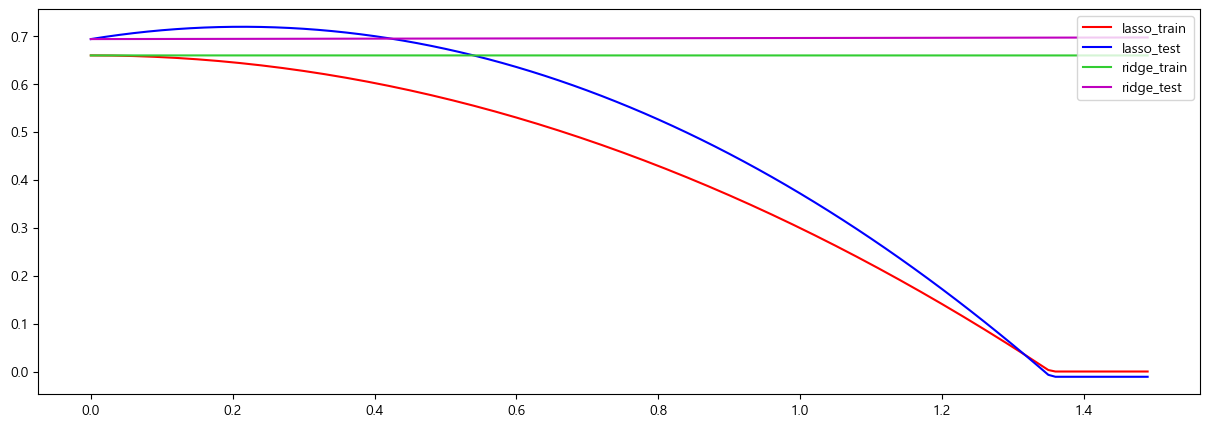

In [20]:
from tqdm import tqdm
LRtrain_list = []
LRtest_list = []
lassotrain_list = []
lassotest_list = []
ridgetrain_list = []
ridgetest_list = []

X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

mylist = np.arange(0, 1.5, 0.01)

for i in tqdm(list(mylist)):
    LR = LinearRegression()
    lasso = Lasso(alpha=i)
    ridge = Ridge(alpha=i)
    
    LR.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    ridge.fit(X_train, y_train)
    
    lassotrain_list.append(lasso.score(X_train, y_train))
    lassotest_list.append(lasso.score(X_test, y_test))
    
    ridgetrain_list.append(ridge.score(X_train, y_train))
    ridgetest_list.append(ridge.score(X_test, y_test))
    
# plt.plot(X_test, model1.predict(X_test), c = "r")
# plt.plot(X_test, model2.predict(X_test), c = "b")
# plt.plot(X_test, model3.predict(X_test), c = "green")
# plt.scatter(X_test, y_test, c = "black")
# plt.show()

plt.figure(figsize = (15,5))
plt.plot(list(mylist), lassotrain_list, label = "lasso_train", color = "r")
plt.plot(list(mylist), lassotest_list, label = "lasso_test", color = "b")

plt.plot(list(mylist), ridgetrain_list, label = "ridge_train", color = "limegreen")
plt.plot(list(mylist), ridgetest_list, label = "ridge_test", color = "m")
plt.legend(loc = "upper right") 
plt.show()

In [23]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y = pd.DataFrame(cancer['target'], columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

model = LogisticRegression(C=0.1, max_iter=5000)
model.fit(X_train, y_train)

predict = list(model.predict(X_test))
label = list(y_test['target'])

# 틀릴 확률
diff = [abs(label[i]-predict[i]) for i in range(len(label))]
accuracy = sum(diff) / len(label)
accuracy

# 맞을 확률 / accuracy
score = 0
for a,i in enumerate(predict):
    if label[a]==i:
        score += 1
    else:
        pass
ac = score / len(predict)
ac

# 확인용
# model.score(X_test, y_test['target'].to_numpy())/

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9440559440559441